In [1]:
!pip install wordcloud nltk seaborn scikit-learn


In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import nltk

from nltk.corpus import stopwords
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from imblearn.over_sampling import SMOTE

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
from google.colab import files
files.upload()   # upload twitter.csv


Saving twitter.csv to twitter (1).csv


{'twitter (1).csv': b'id,label,tweet\n1,0, @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run\n2,0,@user @user thanks for #lyft credit i can\'t use cause they don\'t offer wheelchair vans in pdx.    #disapointed #getthanked\n3,0,  bihday your majesty\n4,0,#model   i love u take with u all the time in ur\xc3\xb0\xc2\x9f\xc2\x93\xc2\xb1!!! \xc3\xb0\xc2\x9f\xc2\x98\xc2\x99\xc3\xb0\xc2\x9f\xc2\x98\xc2\x8e\xc3\xb0\xc2\x9f\xc2\x91\xc2\x84\xc3\xb0\xc2\x9f\xc2\x91\xc2\x85\xc3\xb0\xc2\x9f\xc2\x92\xc2\xa6\xc3\xb0\xc2\x9f\xc2\x92\xc2\xa6\xc3\xb0\xc2\x9f\xc2\x92\xc2\xa6  \n5,0, factsguide: society now    #motivation\n6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  \n7,0, @user camping tomorrow @user @user @user @user @user @user @user danny\xc3\xa2\xc2\x80\xc2\xa6\n8,0,the next school year is the year for exams.\xc3\xb0\xc2\x9f\xc2\x98\xc2\xaf can\'t think about that \xc3\xb0\

In [9]:
tweets_df = pd.read_csv("twitter.csv")
tweets_df = tweets_df.drop(['id'], axis=1)
tweets_df.head()



,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


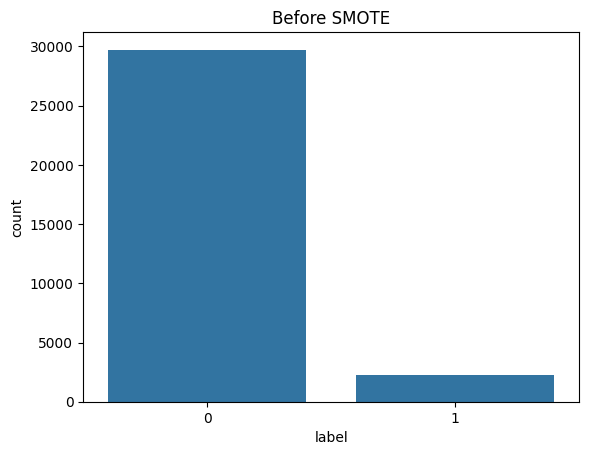

,count
label,
0,29720
1,2242


In [10]:
sns.countplot(x='label', data=tweets_df)
plt.title("Before SMOTE")
plt.show()

tweets_df['label'].value_counts()


In [11]:
STOPWORDS = set(stopwords.words('english'))
NEGATION_WORDS = {"not", "no", "nor", "never"}
STOPWORDS = STOPWORDS - NEGATION_WORDS

def clean_text(text):
    text = ''.join(char for char in text if char not in string.punctuation)
    return " ".join(
        word.lower()
        for word in text.split()
        if word.lower() not in STOPWORDS
    )


In [16]:
tfidf = TfidfVectorizer(
    preprocessor=clean_text,
    ngram_range=(1,2),
    min_df=2,
    max_df=0.9
)

X = tfidf.fit_transform(tweets_df['tweet'])
y = tweets_df['label']

print("TF-IDF shape:", X.shape)


TF-IDF shape: (31962, 38758)


In [18]:
smote = SMOTE(random_state=42)

X_smote, y_smote = smote.fit_resample(X, y)

print("After SMOTE class distribution:")
print(pd.Series(y_smote).value_counts())


After SMOTE class distribution:
label
0    29720
1    29720
Name: count, dtype: int64


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X_smote,
    y_smote,
    test_size=0.2,
    random_state=42
)


In [24]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)


MultinomialNB()

In [25]:
y_pred_nb = nb_model.predict(X_test)

print("NAIVE BAYES REPORT\n")
print(classification_report(y_test, y_pred_nb))

print("Accuracy:", accuracy_score(y_test, y_pred_nb))


NAIVE BAYES REPORT

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      5892
           1       0.93      0.99      0.96      5996

    accuracy                           0.96     11888
   macro avg       0.96      0.96      0.96     11888
weighted avg       0.96      0.96      0.96     11888

Accuracy: 0.960464333781965


In [26]:
y_pred_nb = nb_model.predict(X_test)

print("NAIVE BAYES REPORT\n")
print(classification_report(y_test, y_pred_nb))

print("Accuracy:", accuracy_score(y_test, y_pred_nb))


NAIVE BAYES REPORT

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      5892
           1       0.93      0.99      0.96      5996

    accuracy                           0.96     11888
   macro avg       0.96      0.96      0.96     11888
weighted avg       0.96      0.96      0.96     11888

Accuracy: 0.960464333781965


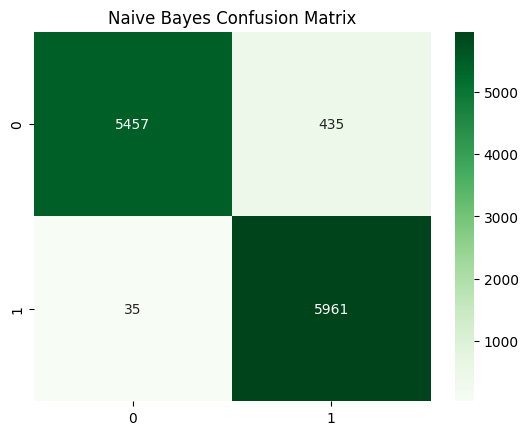

In [27]:
cm_nb = confusion_matrix(y_test, y_pred_nb)

sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens')
plt.title("Naive Bayes Confusion Matrix")
plt.show()


In [29]:
test_tweets = [
    "I love this product, it is amazing",
    "Worst experience ever",
    "Not bad but not great",
    "I do not like this at all",
    "Absolutely terrible service"
]

test_vec = tfidf.transform(test_tweets)



print("\nNAIVE BAYES PREDICTIONS")
for t, p in zip(test_tweets, nb_model.predict(test_vec)):
    print(t, "→", "Positive" if p == 0 else "Negative")



NAIVE BAYES PREDICTIONS
I love this product, it is amazing → Positive
Worst experience ever → Negative
Not bad but not great → Positive
I do not like this at all → Negative
Absolutely terrible service → Positive
